In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import os

In [84]:
file_path = r'C:\Users\jhc\OneDrive - Oak Ridge National Laboratory\ForgeNano\Maccor\Single layer\Test3\JB_FN_091124_CC1_1_formation.053.txt'
# Regular expression to find the "Comment" value

try:
    df = pd.read_csv(file_path, sep=None, engine='python', header=3, on_bad_lines='skip')
    
except Exception as e:
    print(f"Error reading file: {e}")
    
filename = os.path.splitext(os.path.basename(file_path))[0]
mass = 0.4393125


print(filename)
print(df['Cycle C'].unique())

YF_FN_030524_PP_2_test5.036
[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  19

In [85]:
df_filtered = df[df['MD'].isin(['C', 'D'])]
df_table = pd.DataFrame(df_filtered)

# Display the filtered DataFrame
def parse_test_time_to_seconds(test_time):
    days, time = test_time.split('d ')
    hours, minutes, seconds = map(int, time.split(':'))
    timedelta = pd.Timedelta(days=int(days), hours=hours, minutes=minutes, seconds=seconds)
    return timedelta.total_seconds()

# Apply the function to the 'Test Time' column
df_table['Seconds'] = df_table['Test Time'].apply(parse_test_time_to_seconds)
if df_table['Capacity (mAHr)'].dtype != 'object':
    df_table['Capacity (mAHr)'] = df_table['Capacity (mAHr)'].astype(str)
df_table['Capacity (mAHr)'] = df_table['Capacity (mAHr)'].str.replace(',', '')
df_table['Capacity (mAHr)'] = df_table['Capacity (mAHr)'].astype(float)
df_table['Capacity (mAHr)'] = df_table['Capacity (mAHr)']/mass

# Time = df_table.loc[:,'Seconds']
# Time2 = Time-Time.iloc[0]
# Vol = df_table.loc[:,'Voltage']
# Cap = df_table.loc[:,'Capacity (mAHr)']

In [86]:
# cycles = df_table['Cycle C'].unique()
all_cycles = df['Cycle C'].unique()
plot_cycles = [2,5,10,50,100,480]

result_df = pd.DataFrame()
last_capacity_c_d_dict = {
    'Cycle_Number': [],
    'Last_Capacity_C': [],
    'Last_Capacity_D': [],
    'Coulombic_E': [],
    'Avg_Voltage_C': [],
    'Avg_Voltage_D': [],
}

for cycle in all_cycles:
    # print(cycle)
    cycle_data = df_table[df_table['Cycle C'] == cycle]
    
    # if cycle_data[(cycle_data['MD'] == 'C')&(cycle_data['Step'] == 5)].empty:
        
    #     capacity_c = cycle_data[cycle_data['MD'] == 'C']['Capacity (mAHr)'].reset_index(drop=True)
    #     capacity_cccv = []
    #     # print('o')

    # else:
    #     capacity_c = cycle_data[cycle_data['MD'] == 'C']['Capacity (mAHr)'].reset_index(drop=True)
    #     capacity_cccv = cycle_data[(cycle_data['MD'] == 'C')&(cycle_data['Step'] == 5)]['Capacity (mAHr)'].reset_index(drop=True)
        
    #     # print('x')
        
    #     # Determine the start index for the replacement
    #     start_index = len(capacity_c) - len(capacity_cccv)
    #     # print(f"Start index for replacement: {start_index}")

    #     # Replace the appropriate part of capacity_c with capacity_cccv
    #     capacity_cccv = capacity_cccv + capacity_c.iloc[start_index - 1]
    #     capacity_c.iloc[start_index:] = capacity_cccv.reset_index(drop=True)
    #     # print('Replaced part of capacity_c with capacity_cccv for Cycle', cycle)
    
    capacity_c = cycle_data[cycle_data['MD'] == 'C']['Capacity (mAHr)'].reset_index(drop=True)                
    voltage_c = cycle_data[cycle_data['MD'] == 'C']['Voltage'].reset_index(drop=True)
    capacity_d = cycle_data[cycle_data['MD'] == 'D']['Capacity (mAHr)'].reset_index(drop=True)
    voltage_d = cycle_data[cycle_data['MD'] == 'D']['Voltage'].reset_index(drop=True)
    
    # Check if capacity_d is empty before accessing its last element
    if not capacity_d.empty:
        last_capacity_d = capacity_d.iloc[-1]
    else:
        last_capacity_d = np.nan    
    last_capacity_c = capacity_c.iloc[-1]
    coulombic_eff = last_capacity_d / last_capacity_c*100 if last_capacity_c !=0 else np.nan
    
    # Calculate average voltages
    avg_voltage_c = voltage_c.mean() if not voltage_c.empty else np.nan
    avg_voltage_d = voltage_d.mean() if not voltage_d.empty else np.nan
    
    last_capacity_c_d_dict['Cycle_Number'].append(cycle)
    last_capacity_c_d_dict['Last_Capacity_C'].append(last_capacity_c)   
    last_capacity_c_d_dict['Last_Capacity_D'].append(last_capacity_d)
    last_capacity_c_d_dict['Coulombic_E'].append(coulombic_eff)
    last_capacity_c_d_dict['Avg_Voltage_C'].append(avg_voltage_c)
    last_capacity_c_d_dict['Avg_Voltage_D'].append(avg_voltage_d)
    
    if cycle in plot_cycles:
        # Find the maximum length of the data series
        max_length = max(len(capacity_c), len(voltage_c), len(capacity_d), len(voltage_d))
        
        # Pad the shorter series with NaNs
        capacity_c = capacity_c.reindex(range(max_length))
        voltage_c = voltage_c.reindex(range(max_length))
        capacity_d = capacity_d.reindex(range(max_length))
        voltage_d = voltage_d.reindex(range(max_length))
    
        # Combine the data into a single DataFrame
        combined_data = pd.DataFrame({
            f'Capacity_Cycle{cycle}_C': capacity_c,
            f'Voltage_Cycle{cycle}_C': voltage_c,
            f'Capacity_Cycle{cycle}_D': capacity_d,
            f'Voltage_Cycle{cycle}_D': voltage_d,
        })
        
        # combined_data.update(capacity_cccv)
    
        # Concatenate the combined data to the result DataFrame
        result_df = pd.concat([result_df, combined_data], axis=1)

# Create the DataFrame for the last capacity values
last_capacity_c_d_df = pd.DataFrame(last_capacity_c_d_dict)

result_df.loc[len(result_df)] = np.nan

# Save the result to a CSV file
result_df.to_csv(f'{filename}.csv', index=False)
last_capacity_c_d_df.to_csv(f'{filename}_Cap.csv', index=False)
# print(last_capacity_c_d_df)

<Figure size 641x500 with 0 Axes>

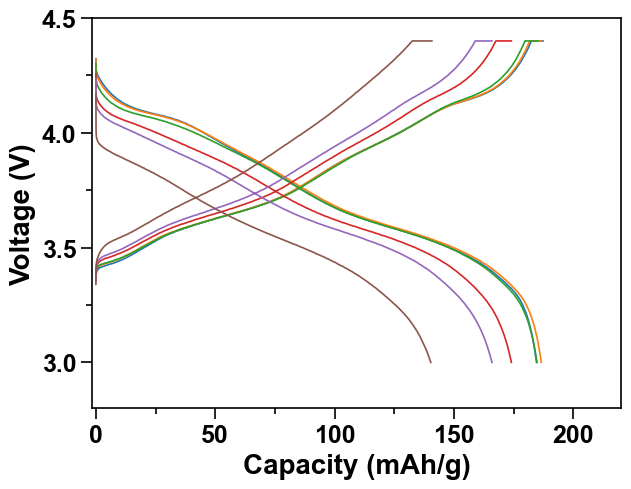

<Figure size 641x500 with 0 Axes>

In [87]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

plt.figure(figsize=(6.41, 5))
plt.rcParams['axes.linewidth'] = 1.2
plt.gca().xaxis.set_major_locator(MultipleLocator(50))  # Major ticks every 50 units
plt.gca().yaxis.set_major_locator(MultipleLocator(0.5))
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(25))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.25))
plt.tick_params(width=1.2, length=8)
plt.tick_params(which='minor',width=1.2, length=4)
plt.xlim(-1.5, 220)
plt.ylim(2.8, 4.5)
plt.xticks(fontname='Arial', fontsize = 18, fontweight='bold')
plt.yticks(fontname='Arial', fontsize = 18, fontweight='bold')
plt.xlabel("Capacity (mAh/g)", fontname='Arial', fontsize=20, fontweight='bold')
plt.ylabel("Voltage (V)", fontname='Arial', fontsize=20, fontweight='bold')
plt.tight_layout()

# Change this to the cycle number you want to plot (e.g., 2, 3, etc.)
cycle_number = plot_cycles  

modes = ['C','D']

for cycle in cycle_number:
    Cap_C = result_df[f'Capacity_Cycle{cycle}_C']
    Vol_C = result_df[f'Voltage_Cycle{cycle}_C']
    Cap_D = result_df[f'Capacity_Cycle{cycle}_D']
    Vol_D = result_df[f'Voltage_Cycle{cycle}_D']

    # plt.plot(Cap_C,Vol_C,Cap_D,Vol_D)
    Cap = pd.concat([Cap_C, Cap_D]).reset_index(drop=True)
    Vol = pd.concat([Vol_C, Vol_D]).reset_index(drop=True)

    # Create label for legend
    # label = f'Cycle {cycle}'     
    label = f'{cycle}'

    plt.plot(Cap, Vol, label = label, linewidth = 1.2)


# plt.legend(fontsize=20,loc='best',frameon=False, prop={'family': 'Arial', 'size': 15, 'weight': 'bold'})
# plt.legend(fontsize=16,loc='best',frameon=False,bbox_to_anchor=(0.6,0.4), prop={'family': 'Arial', 'size': 15, 'weight': 'bold'})

plt.savefig(f'{filename}.png', dpi=500)
plt.figure(figsize=(6.41, 5))

#plt.savefig(r'C:\Users\choi1\OneDrive - The Ohio State University\Documents\Weekly Report\20230212\NH4F_W_1st.png',bbox_inches='tight')

<Figure size 641x500 with 0 Axes>

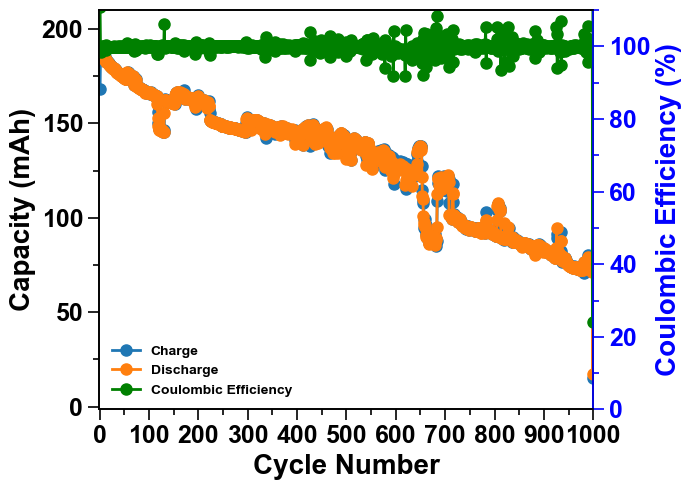

<Figure size 641x500 with 0 Axes>

In [88]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax1 = plt.subplots(figsize=(6.41, 5))
plt.rcParams['axes.linewidth'] = 1.2
ax1.xaxis.set_major_locator(MultipleLocator(100))  # Major ticks every 100 units
ax1.yaxis.set_major_locator(MultipleLocator(50))
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(MultipleLocator(50))
ax1.yaxis.set_minor_locator(MultipleLocator(25))
ax1.tick_params(width=1.2, length=8)
ax1.tick_params(which='minor', width=1.2, length=4)
ax1.set_xlim(-0.5, len(df['Cycle C'].unique()))
ax1.set_ylim(-1.5, 210)
plt.xticks(fontname='Arial', fontsize=18, fontweight='bold')
plt.yticks(fontname='Arial', fontsize=18, fontweight='bold')
ax1.set_xlabel("Cycle Number", fontname='Arial', fontsize=20, fontweight='bold')
ax1.set_ylabel("Capacity (mAh)", fontname='Arial', fontsize=20, fontweight='bold')
plt.tight_layout()

Cap_C = last_capacity_c_d_df['Last_Capacity_C']
Cap_D = last_capacity_c_d_df['Last_Capacity_D']
Cyc_N = last_capacity_c_d_df['Cycle_Number']

line1, = ax1.plot(Cyc_N, Cap_C, marker='o', linestyle='-', label='Charge', markersize=8, linewidth=2)
line2, = ax1.plot(Cyc_N, Cap_D, marker='o', linestyle='-', label='Discharge', markersize=8, linewidth=2)

# plt.scatter(Cyc_N, Cap_C, color='c0', edgecolor='black', s=80, label='Charge', alpha=1, linewidth=0.5)
# plt.scatter(Cyc_N, Cap_D, color='#ff7f0e', edgecolor='black', s=80, label='Discharge', alpha=1, linewidth=0.5)
# plt.plot(Cyc_N, Cap_C, color='#ff7f0e', marker='o', markersize=8, linestyle='-', linewidth=2, markeredgecolor='red')

# Create the second y-axis for Coulombic Efficiency
ax2 = ax1.twinx()
ax2.yaxis.set_major_locator(MultipleLocator(20))
ax2.yaxis.set_minor_locator(MultipleLocator(10))
ax2.tick_params(width=1.2, length=8, colors='blue')
ax2.tick_params(which='minor', width=1.2, length=4, colors='blue')
ax2.set_ylim(0, 110)  # Adjust the limits as needed for Coulombic Efficiency
ax2.set_ylabel("Coulombic Efficiency (%)", fontname='Arial', fontsize=20, fontweight='bold', color='blue')
ax2.spines['right'].set_color('blue')
plt.yticks(fontname='Arial', fontsize=18, fontweight='bold')

Col_E = last_capacity_c_d_dict['Coulombic_E']

line3, = ax2.plot(Cyc_N, Col_E, color='green', marker='o', linestyle='-', label='Coulombic Efficiency', markersize=8, linewidth=2)

# Combine legends from both axes
lines = [line1, line2, line3]
labels = [line.get_label() for line in lines]
ax2.legend(lines, labels, fontsize=32, loc='best', frameon=False, prop={'family': 'Arial', 'weight': 'bold'})

plt.savefig(f'{filename}_Cap.png', dpi=500)
plt.figure(figsize=(6.41, 5))

<Figure size 641x500 with 0 Axes>

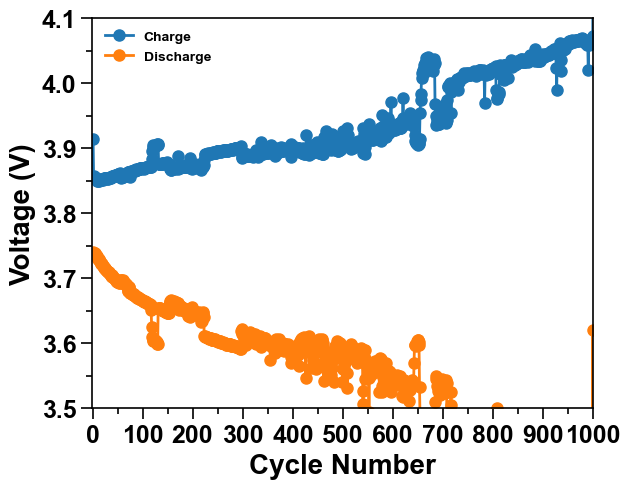

<Figure size 641x500 with 0 Axes>

In [89]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

plt.figure(figsize=(6.41, 5))
plt.rcParams['axes.linewidth'] = 1.2
plt.gca().xaxis.set_major_locator(MultipleLocator(100))  # Major ticks every 50 units
plt.gca().yaxis.set_major_locator(MultipleLocator(0.1))
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(50))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.05))
plt.tick_params(width=1.2, length=8)
plt.tick_params(which='minor',width=1.2, length=4)
plt.xlim(-0.5, len(df['Cycle C'].unique()))
plt.ylim(3.5, 4.1)
plt.xticks(fontname='Arial', fontsize = 18, fontweight='bold')
plt.yticks(fontname='Arial', fontsize = 18, fontweight='bold')
plt.xlabel("Cycle Number", fontname='Arial', fontsize=20, fontweight='bold')
plt.ylabel("Voltage (V)", fontname='Arial', fontsize=20, fontweight='bold')
plt.tight_layout()

Vol_C = last_capacity_c_d_df['Avg_Voltage_C']
Vol_D = last_capacity_c_d_df['Avg_Voltage_D']
Cyc_N = last_capacity_c_d_df['Cycle_Number']

plt.plot(Cyc_N, Vol_C, marker='o', linestyle='-', label='Charge', markersize=8, linewidth=2)
plt.plot(Cyc_N, Vol_D, marker='o', linestyle='-', label='Discharge', markersize=8, linewidth=2)
# plt.scatter(Cyc_N, Cap_C, color='c0', edgecolor='black', s=80, label='Charge', alpha=1, linewidth=0.5)
# plt.scatter(Cyc_N, Cap_D, color='#ff7f0e', edgecolor='black', s=80, label='Discharge', alpha=1, linewidth=0.5)
# plt.plot(Cyc_N, Cap_C, color='#ff7f0e', marker='o', markersize=8, linestyle='-', linewidth=2, markeredgecolor='red')

plt.legend(fontsize=20, loc='best', frameon=False, prop={'family': 'Arial', 'weight': 'bold'})

plt.savefig(f'{filename}_Vol.png', dpi=500)
plt.figure(figsize=(6.41, 5))